# Lambda School Data Science - Loading, Cleaning and Visualizing Data

Objectives for today:
- Load data from multiple sources into a Python notebook 
 - !curl method
 - CSV upload method
- Create basic plots appropriate for different data types
 - Scatter Plot
 - Histogram
 - Density Plot
 - Pairplot
- "Clean" a dataset using common Python libraries
 - Removing NaN values "Interpolation"

# Part 1 - Loading Data

Data comes in many shapes and sizes - we'll start by loading tabular data, usually in csv format.

Data set sources:

- https://archive.ics.uci.edu/ml/datasets.html
- https://github.com/awesomedata/awesome-public-datasets
- https://registry.opendata.aws/ (beyond scope for now, but good to be aware of)

Let's start with an example - [data about flags](https://archive.ics.uci.edu/ml/datasets/Flags).

## Lecture example - flag data

In [1]:
# Step 1 - find the actual file to download

# From navigating the page, clicking "Data Folder"
flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

# You can "shell out" in a notebook for more powerful tools
# https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html

# Funny extension, but on inspection looks like a csv
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data

# Extensions are just a norm! You have to inspect to be sure what something is

## Test on local machine.  Using git commit to push to self repository. 

Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black
Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue
Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red
Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue
Argentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue
Australia,6,2,7690,15,1,1,0,0,3,1,0,1,0,1,0,0,blue,0,1,1,1,6,0,0,0,0,0,white,blue
Austria,3,1,84,8,4,0,0,3,2,1,0,0,0,1,0,0,red,0,0,0,0,0,0,0,0,0,0,red,red
Bahamas,1,4,19,0,1,1,0,3,3,0,0,1,1,0,1,0,blue,0,0,

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15240  100 15240    0     0  12270      0  0:00:01  0:00:01 --:--:-- 12270


In [2]:
# Step 2 - load the data

# How to deal with a csv? 🐼
import pandas as pd
flag_data = pd.read_csv(flag_data_url)

In [3]:
# Step 3 - verify we've got *something*
flag_data.head()

,Afghanistan,5,1,648,16,10,2,0,3,5.1,...,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
0,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black


In [4]:
# Step 4 - Looks a bit odd - verify that it is what we want
flag_data.count()

Afghanistan    193
5              193
1              193
648            193
16             193
10             193
2              193
0              193
3              193
5.1            193
1.1            193
1.2            193
0.1            193
1.3            193
1.4            193
1.5            193
0.2            193
green          193
0.3            193
0.4            193
0.5            193
0.6            193
1.6            193
0.7            193
0.8            193
1.7            193
0.9            193
0.10           193
black          193
green.1        193
dtype: int64

In [5]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data | wc

'wc' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
# So we have 193 observations with funny names, file has 194 rows
# Looks like the file has no header row, but read_csv assumes it does
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [7]:
?pd.read_csv

In [8]:
??pd.read_csv

In [9]:
# Alright, we can pass header=None to fix this
flag_data = pd.read_csv(flag_data_url, header=None)
flag_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [10]:
flag_data.count()

0     194
1     194
2     194
3     194
4     194
5     194
6     194
7     194
8     194
9     194
10    194
11    194
12    194
13    194
14    194
15    194
16    194
17    194
18    194
19    194
20    194
21    194
22    194
23    194
24    194
25    194
26    194
27    194
28    194
29    194
dtype: int64

In [11]:
flag_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

### Yes, but what does it *mean*?

This data is fairly nice - it was "donated" and is already "clean" (no missing values). But there are no variable names - so we have to look at the codebook (also from the site).

```
1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)
```

Exercise - read the help for `read_csv` and figure out how to load the data with the above variable names. One pitfall to note - with `header=None` pandas generated variable names starting from 0, but the above list starts from 1...

## Loading from a local CSV to Google Colab

# Part 2 - Basic Visualizations

## Basic Data Visualizations Using Matplotlib

In [12]:
import matplotlib.pyplot as plt

# Scatter Plot

In [13]:
# Histogram

In [14]:
# Seaborn Density Plot

In [15]:
# Seaborn Pairplot

## Create the same basic Visualizations using Pandas

In [16]:
# Pandas Histogram - Look familiar?

In [17]:
# Pandas Scatterplot

In [18]:
# Pandas Scatter Matrix - Usually doesn't look too great.

# Part 3 - Deal with Missing Values

## Diagnose Missing Values

Lets use the Adult Dataset from UCI. <https://github.com/ryanleeallred/datasets>

## Fill Missing Values

## Your assignment - pick a dataset and do something like the above

This is purposely open-ended - you can pick any data set you wish. It is highly advised you pick a dataset from UCI or a similar semi-clean source. You don't want the data that you're working with for this assignment to have any bigger issues than maybe not having headers or including missing values, etc.

After you have chosen your dataset, do the following:

- Import the dataset using the method that you are least comfortable with (!curl or CSV upload).
 - Make sure that your dataset has the number of rows and columns that you expect.
 - Make sure that your dataset has appropriate column names, rename them if necessary.
 - If your dataset uses markers like "?" to indicate missing values, replace them with NaNs during import.
- Identify and fill missing values in your dataset (if any)
 - Don't worry about using methods more advanced than the `.fillna()` function for today.
- Create one of each of the following plots using your dataset
 - Scatterplot
 - Histogram
 - Density Plot
 - Pairplot (note that pairplots will take a long time to load with large datasets or datasets with many columns)

If you get that done and want to try more challenging or exotic things, go for it! Use documentation as illustrated above, and follow the 20-minute rule (that is - ask for help if you're stuck!).

If you have loaded a few traditional datasets, see the following section for suggested stretch goals.

In [19]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed


**Bioinformatics Data - Microbiome Research**
<p>Data from American Gut</p>
<p>https://raw.githubusercontent.com/biocore/American-Gut/master/data/AG/AG.txt</p>

In [20]:
## Key libraries
import pandas as pd
import numpy as np

## import data.  The data doesn't come in clean on default parameters.
## error_bad_lines=False to get log for fixes
data = pd.read_csv("https://raw.githubusercontent.com/biocore/American-Gut/master/data/AG/AG.txt", 
                   delimiter='\t', error_bad_lines=False)

C:\Users\vince\Anaconda3\envs\datasc\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (34,197) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
## Something is wrong with the data.  Fun. What is left?
data.head()

,#SampleID,BarcodeSequence,LinkerPrimerSequence,CARBOHYDRATE_PER,NONFOODALLERGIES_DRUG,NONFOODALLERGIES_BEESTINGS,ASSIGNED_FROM_GEO,RUN_DATE,PET_LOCATIONS,AGE,...,LIBRARY_CONSTRUCTION_PROTOCOL,PKU,DECEASED_PARENT,SEQ_RUN,CAT,LATITUDE,FOODALLERGIES_PEANUTS,CHICKENPOX,SEASONAL_ALLERGIES,Description
0,000011224.1210932,no_data,no_data,55,no_data,no_data,n,no_data,Housing...,51.0,...,no_data,no,no_data,no_data,yes,39.7,no_data,yes,no,American Gut Project Stool sample
1,000005034.1076350,no_data,no_data,56,no_data,no_data,n,no_data,no_data,35.0,...,no_data,no,no_data,no_data,yes,32.7,no_data,yes,no,American Gut Project Stool sample
2,000011351.1210669,no_data,no_data,16,no_data,no_data,n,no_data,Housing...,56.0,...,no_data,no,no_data,no_data,no,40.0,no_data,yes,no,American Gut Project Stool sample
3,000002013.1131550,no_data,no_data,no_data,no_data,no_data,n,no_data,Housing...,37.0,...,no_data,no,no_data,no_data,no,40.7,no_data,yes,no,American Gut Project Stool sample
4,000004731.1076409,no_data,no_data,61,yes,no_data,n,no_data,no_data,72.0,...,no_data,no,no_data,no_data,no,43.1,no_data,yes,yes,American Gut Project Stool sample


In [22]:
## Specifying delimiter got the data in.  Trying to use further parameters to improve import.
## Switching to local file for speed
data = pd.read_csv("AG.txt", 
                   delimiter='\t', error_bad_lines=False)
data.head()

,#SampleID,BarcodeSequence,LinkerPrimerSequence,CARBOHYDRATE_PER,NONFOODALLERGIES_DRUG,NONFOODALLERGIES_BEESTINGS,ASSIGNED_FROM_GEO,RUN_DATE,PET_LOCATIONS,AGE,...,LIBRARY_CONSTRUCTION_PROTOCOL,PKU,DECEASED_PARENT,SEQ_RUN,CAT,LATITUDE,FOODALLERGIES_PEANUTS,CHICKENPOX,SEASONAL_ALLERGIES,Description
0,000011224.1210932,no_data,no_data,55,no_data,no_data,n,no_data,Housing...,51.0,...,no_data,no,no_data,no_data,yes,39.7,no_data,yes,no,American Gut Project Stool sample
1,000005034.1076350,no_data,no_data,56,no_data,no_data,n,no_data,no_data,35.0,...,no_data,no,no_data,no_data,yes,32.7,no_data,yes,no,American Gut Project Stool sample
2,000011351.1210669,no_data,no_data,16,no_data,no_data,n,no_data,Housing...,56.0,...,no_data,no,no_data,no_data,no,40.0,no_data,yes,no,American Gut Project Stool sample
3,000002013.1131550,no_data,no_data,no_data,no_data,no_data,n,no_data,Housing...,37.0,...,no_data,no,no_data,no_data,no,40.7,no_data,yes,no,American Gut Project Stool sample
4,000004731.1076409,no_data,no_data,61,yes,no_data,n,no_data,no_data,72.0,...,no_data,no,no_data,no_data,no,43.1,no_data,yes,yes,American Gut Project Stool sample


In [44]:
## That doesn't make a whole lot of sense at first.  Something about getting the file over the network is causing problems.
## Native filesystems may be better for larger datasets

## Some cleaning
data_clean = data.replace(['unknown', 'no_data'], np.NaN)
data_clean.head()


,#SampleID,BarcodeSequence,LinkerPrimerSequence,CARBOHYDRATE_PER,NONFOODALLERGIES_DRUG,NONFOODALLERGIES_BEESTINGS,ASSIGNED_FROM_GEO,RUN_DATE,PET_LOCATIONS,AGE,...,LIBRARY_CONSTRUCTION_PROTOCOL,PKU,DECEASED_PARENT,SEQ_RUN,CAT,LATITUDE,FOODALLERGIES_PEANUTS,CHICKENPOX,SEASONAL_ALLERGIES,Description
0,000011224.1210932,NaN,NaN,55,NaN,NaN,n,NaN,Housing...,51.0,...,NaN,no,NaN,NaN,yes,39.7,NaN,yes,no,American Gut Project Stool sample
1,000005034.1076350,NaN,NaN,56,NaN,NaN,n,NaN,NaN,35.0,...,NaN,no,NaN,NaN,yes,32.7,NaN,yes,no,American Gut Project Stool sample
2,000011351.1210669,NaN,NaN,16,NaN,NaN,n,NaN,Housing...,56.0,...,NaN,no,NaN,NaN,no,40.0,NaN,yes,no,American Gut Project Stool sample
3,000002013.1131550,NaN,NaN,NaN,NaN,NaN,n,NaN,Housing...,37.0,...,NaN,no,NaN,NaN,no,40.7,NaN,yes,no,American Gut Project Stool sample
4,000004731.1076409,NaN,NaN,61,yes,NaN,n,NaN,NaN,72.0,...,NaN,no,NaN,NaN,no,43.1,NaN,yes,yes,American Gut Project Stool sample


In [45]:
## Biological data is awful about this!  So much missing data
data_clean.isna().sum()

#SampleID                           0
BarcodeSequence                  4470
LinkerPrimerSequence             4470
CARBOHYDRATE_PER                 1185
NONFOODALLERGIES_DRUG            4006
NONFOODALLERGIES_BEESTINGS       4604
ASSIGNED_FROM_GEO                   0
RUN_DATE                         4470
PET_LOCATIONS                    2008
AGE                               574
TOT_MASS                          599
GENERAL_MEDS                     4814
SAMPLE_ID                        1072
ORIG_SAMPLE_NAME                 4067
QUINOLINE                        1464
BODY_SITE                         432
MIGRAINE_FACTOR_2                4368
MIGRAINE_FACTOR_3                4462
TONSILS_REMOVED                   596
MIGRAINE_FACTOR_1                4320
ELEVATION                        1962
FLOSSING_FREQUENCY                514
PROTEIN_PER                      1185
CSECTION                          599
PCR_PRIMERS                      4470
COUNTRY_OF_BIRTH                  486
MACRONUTRIEN

In [46]:
## Check the datatypes to see how to deal with values
data_clean.dtypes

#SampleID                        object
BarcodeSequence                  object
LinkerPrimerSequence             object
CARBOHYDRATE_PER                 object
NONFOODALLERGIES_DRUG            object
NONFOODALLERGIES_BEESTINGS       object
ASSIGNED_FROM_GEO                object
RUN_DATE                         object
PET_LOCATIONS                    object
AGE                              object
TOT_MASS                         object
GENERAL_MEDS                     object
SAMPLE_ID                        object
ORIG_SAMPLE_NAME                 object
QUINOLINE                        object
BODY_SITE                        object
MIGRAINE_FACTOR_2                object
MIGRAINE_FACTOR_3                object
TONSILS_REMOVED                  object
MIGRAINE_FACTOR_1                object
ELEVATION                        object
FLOSSING_FREQUENCY               object
PROTEIN_PER                      object
CSECTION                         object
PCR_PRIMERS                      object


In [48]:
## Plotting

## Taking a look a pet locations
data_clean['PET_LOCATIONS'] = data_clean['PET_LOCATIONS'].astype(str)
print(data_clean['PET_LOCATIONS'][:10])

## Interesting.  What all is in here
data_clean['PET_LOCATIONS'].value_counts()

## Minor nightmare for encoding and analysis.  

0    Housing...
1           nan
2    Housing...
3    Housing...
4           nan
5        Indoor
6    Housing...
7       Outdoor
8           nan
9    Housing...
Name: PET_LOCATIONS, dtype: object


nan                                                                             2008
Housing...                                                                      1856
Indoor                                                                           495
Outdoor                                                                          131
Indoor, Indoor                                                                    94
Outdoor, Outdoor                                                                  45
Confined                                                                          44
Indoor, Indoor, Indoor                                                            33
Indoor, Outdoor                                                                   22
Outdoor, Outdoor, Outdoor                                                         13
Outdoor, Indoor                                                                    9
Indoor, Housing...                                               

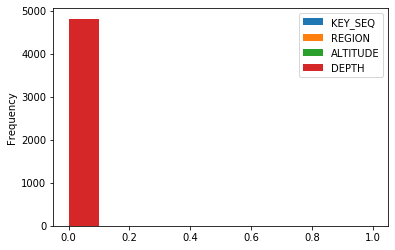

In [51]:
data_clean.plot.hist(by=data_clean.NONFOODALLERGIES_DRUG)
## Some strange stuff in the data.  Need to encode to actually work with it.

X <class 'pandas.core.series.Series'> 3551
Y <class 'pandas.core.series.Series'> 3551


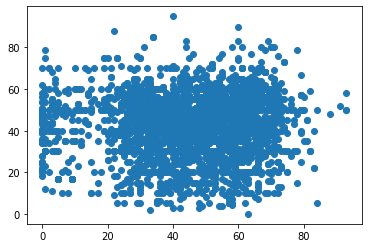

In [55]:
## Something's amiss.  Probably need to re-encode the variables.  Another time...

##Discovered that string 'unknown' in data.

data_drop = data_clean.dropna(subset=['AGE', 'CARBOHYDRATE_PER'])

## Scatter plot with age, carbs
X = data_drop.AGE.astype('float')
Y = data_drop.CARBOHYDRATE_PER.astype('float')
# using the pandas scatter plot won't work here.  Key errors raised.  Separating columns and investigating separately.

## Check to make sure length hasn't changed, index still intact
## Still need index check for QA, but it will plot!
print('X', type(X), len(X))
print('Y', type(Y), len(Y))

plt.scatter(X,Y)

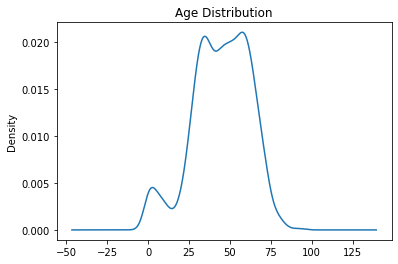

In [60]:
## Since we still have a Pandas object, the density plot is available - woot woot.  No need to do from scratch
X.plot.density(title='Age Distribution')

ValueError: color kwarg must have one color per data set. 3551 data sets and 1 colors were provided

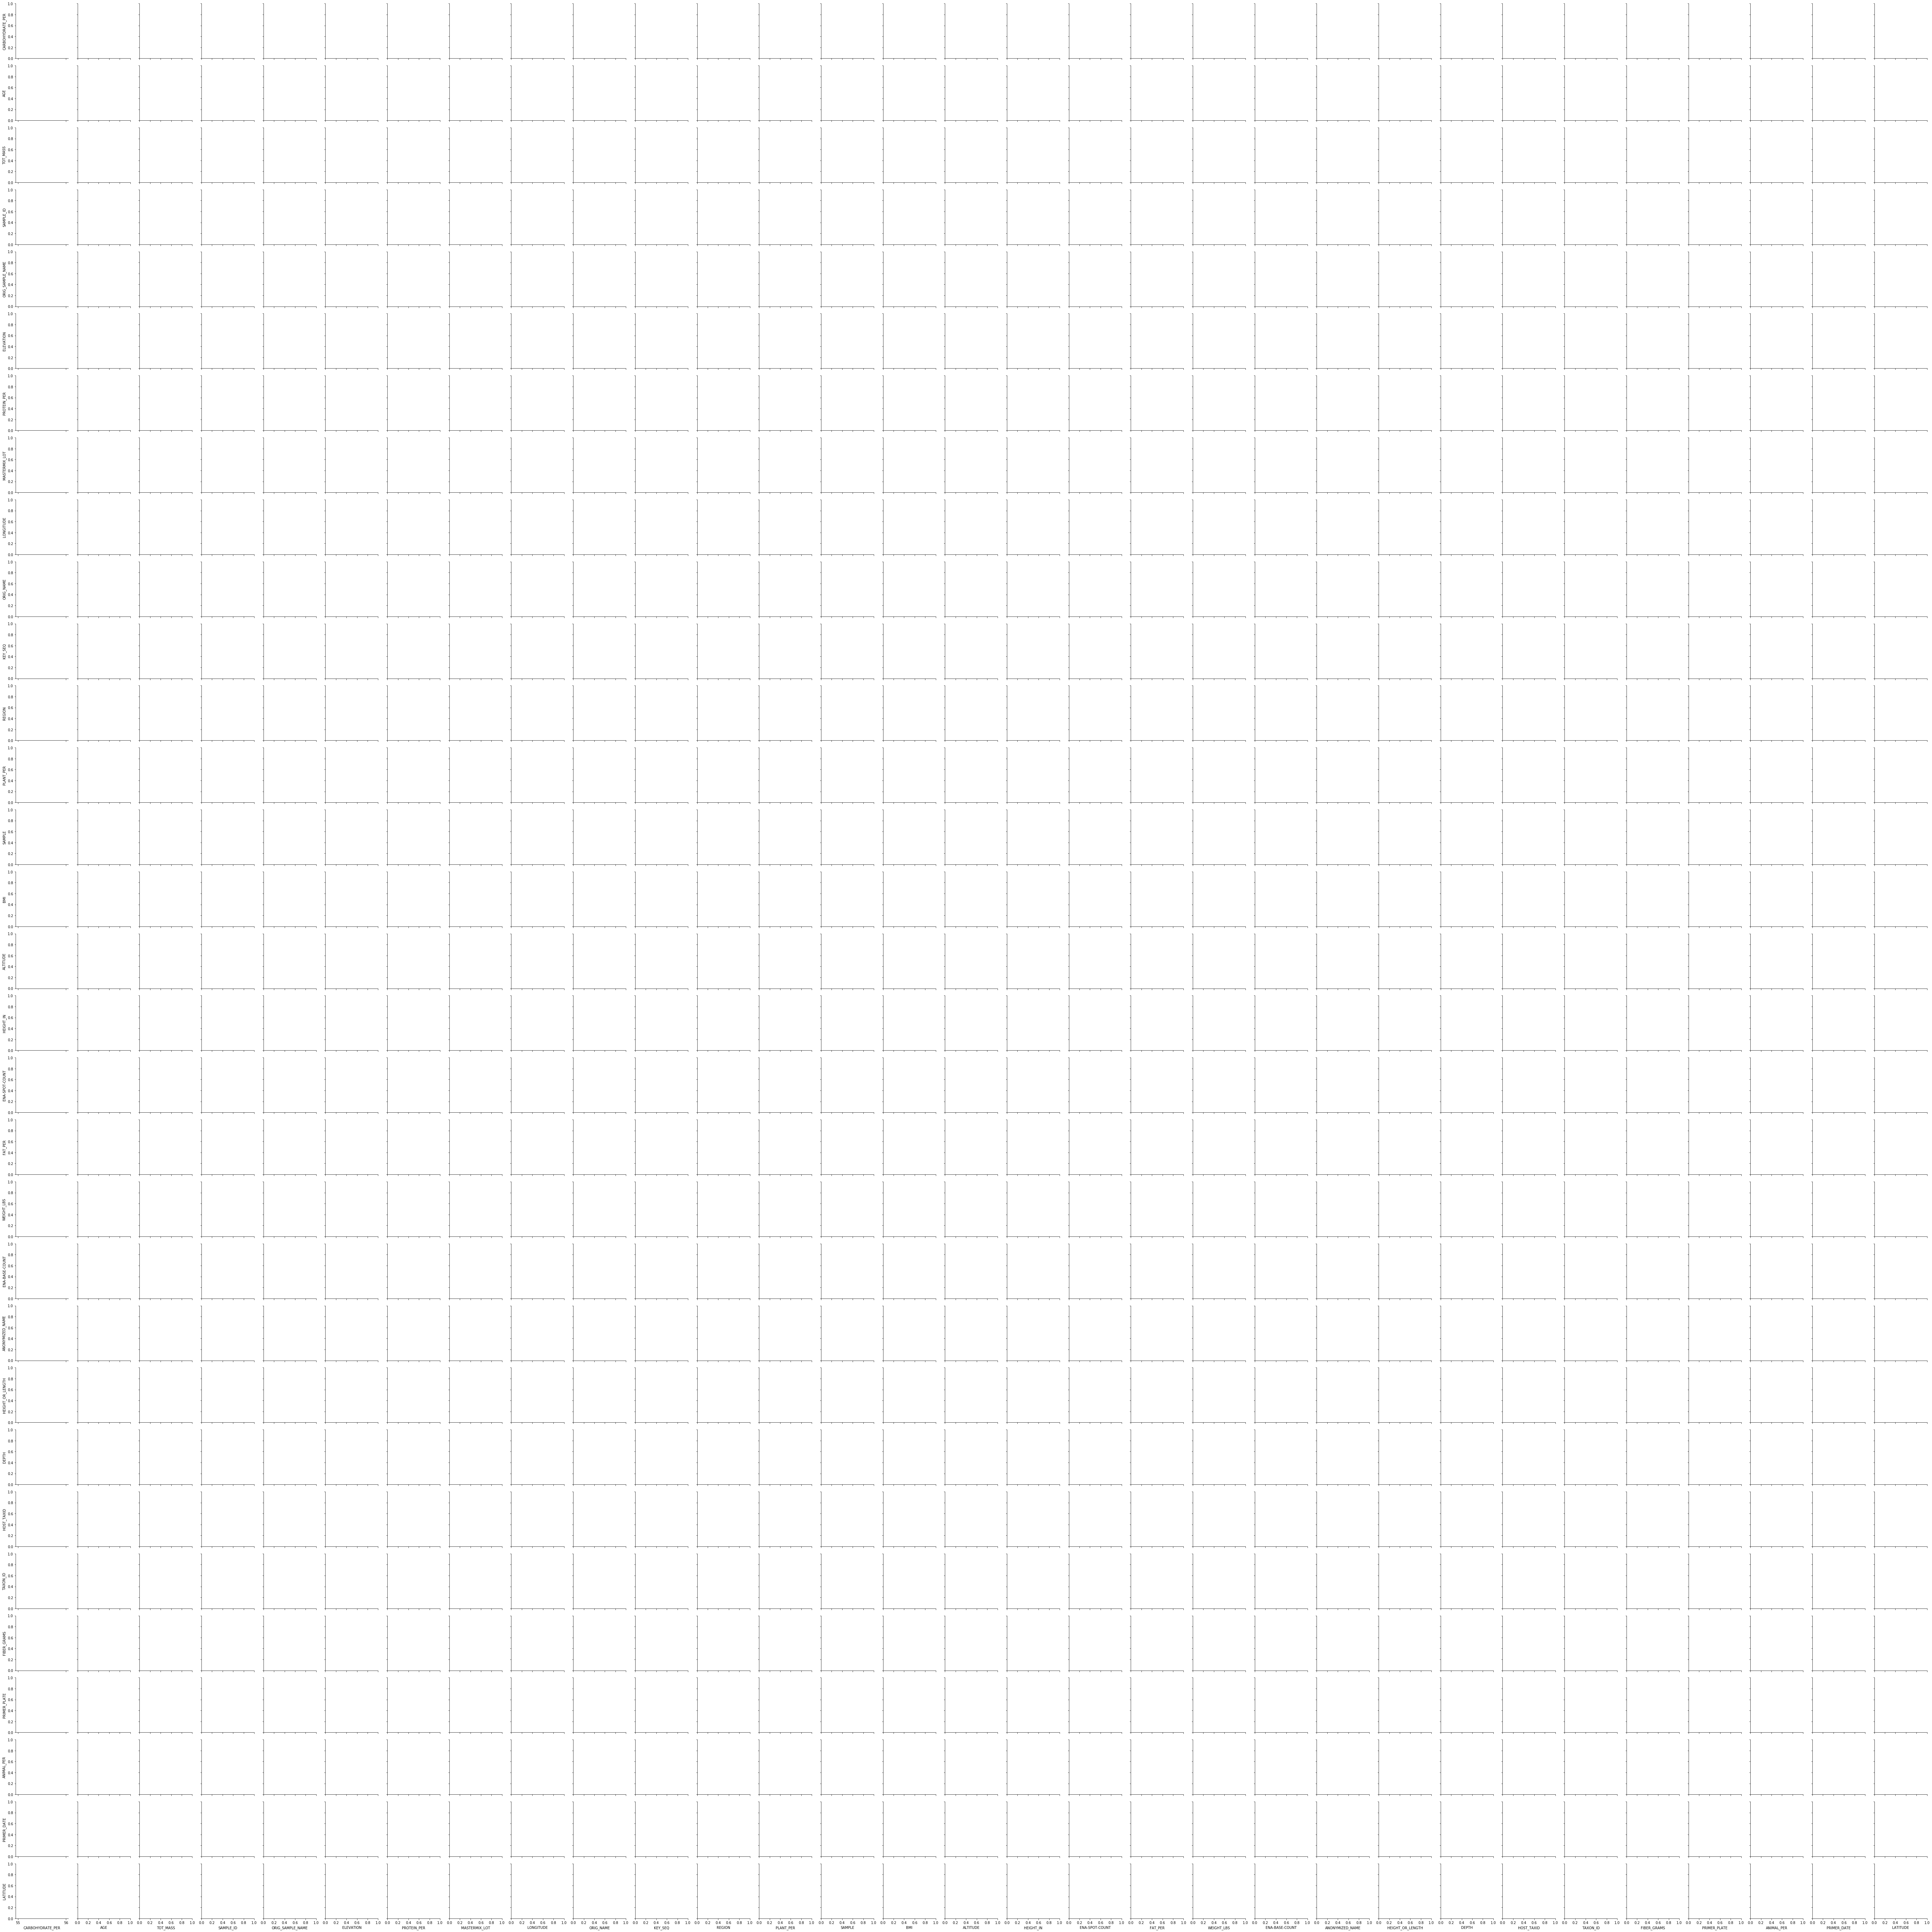

In [66]:
## A pairplot won't be of much use without more cleaning.  It would also have >4000 graphs.
import seaborn as sb

sb.pairplot(data=data_drop)

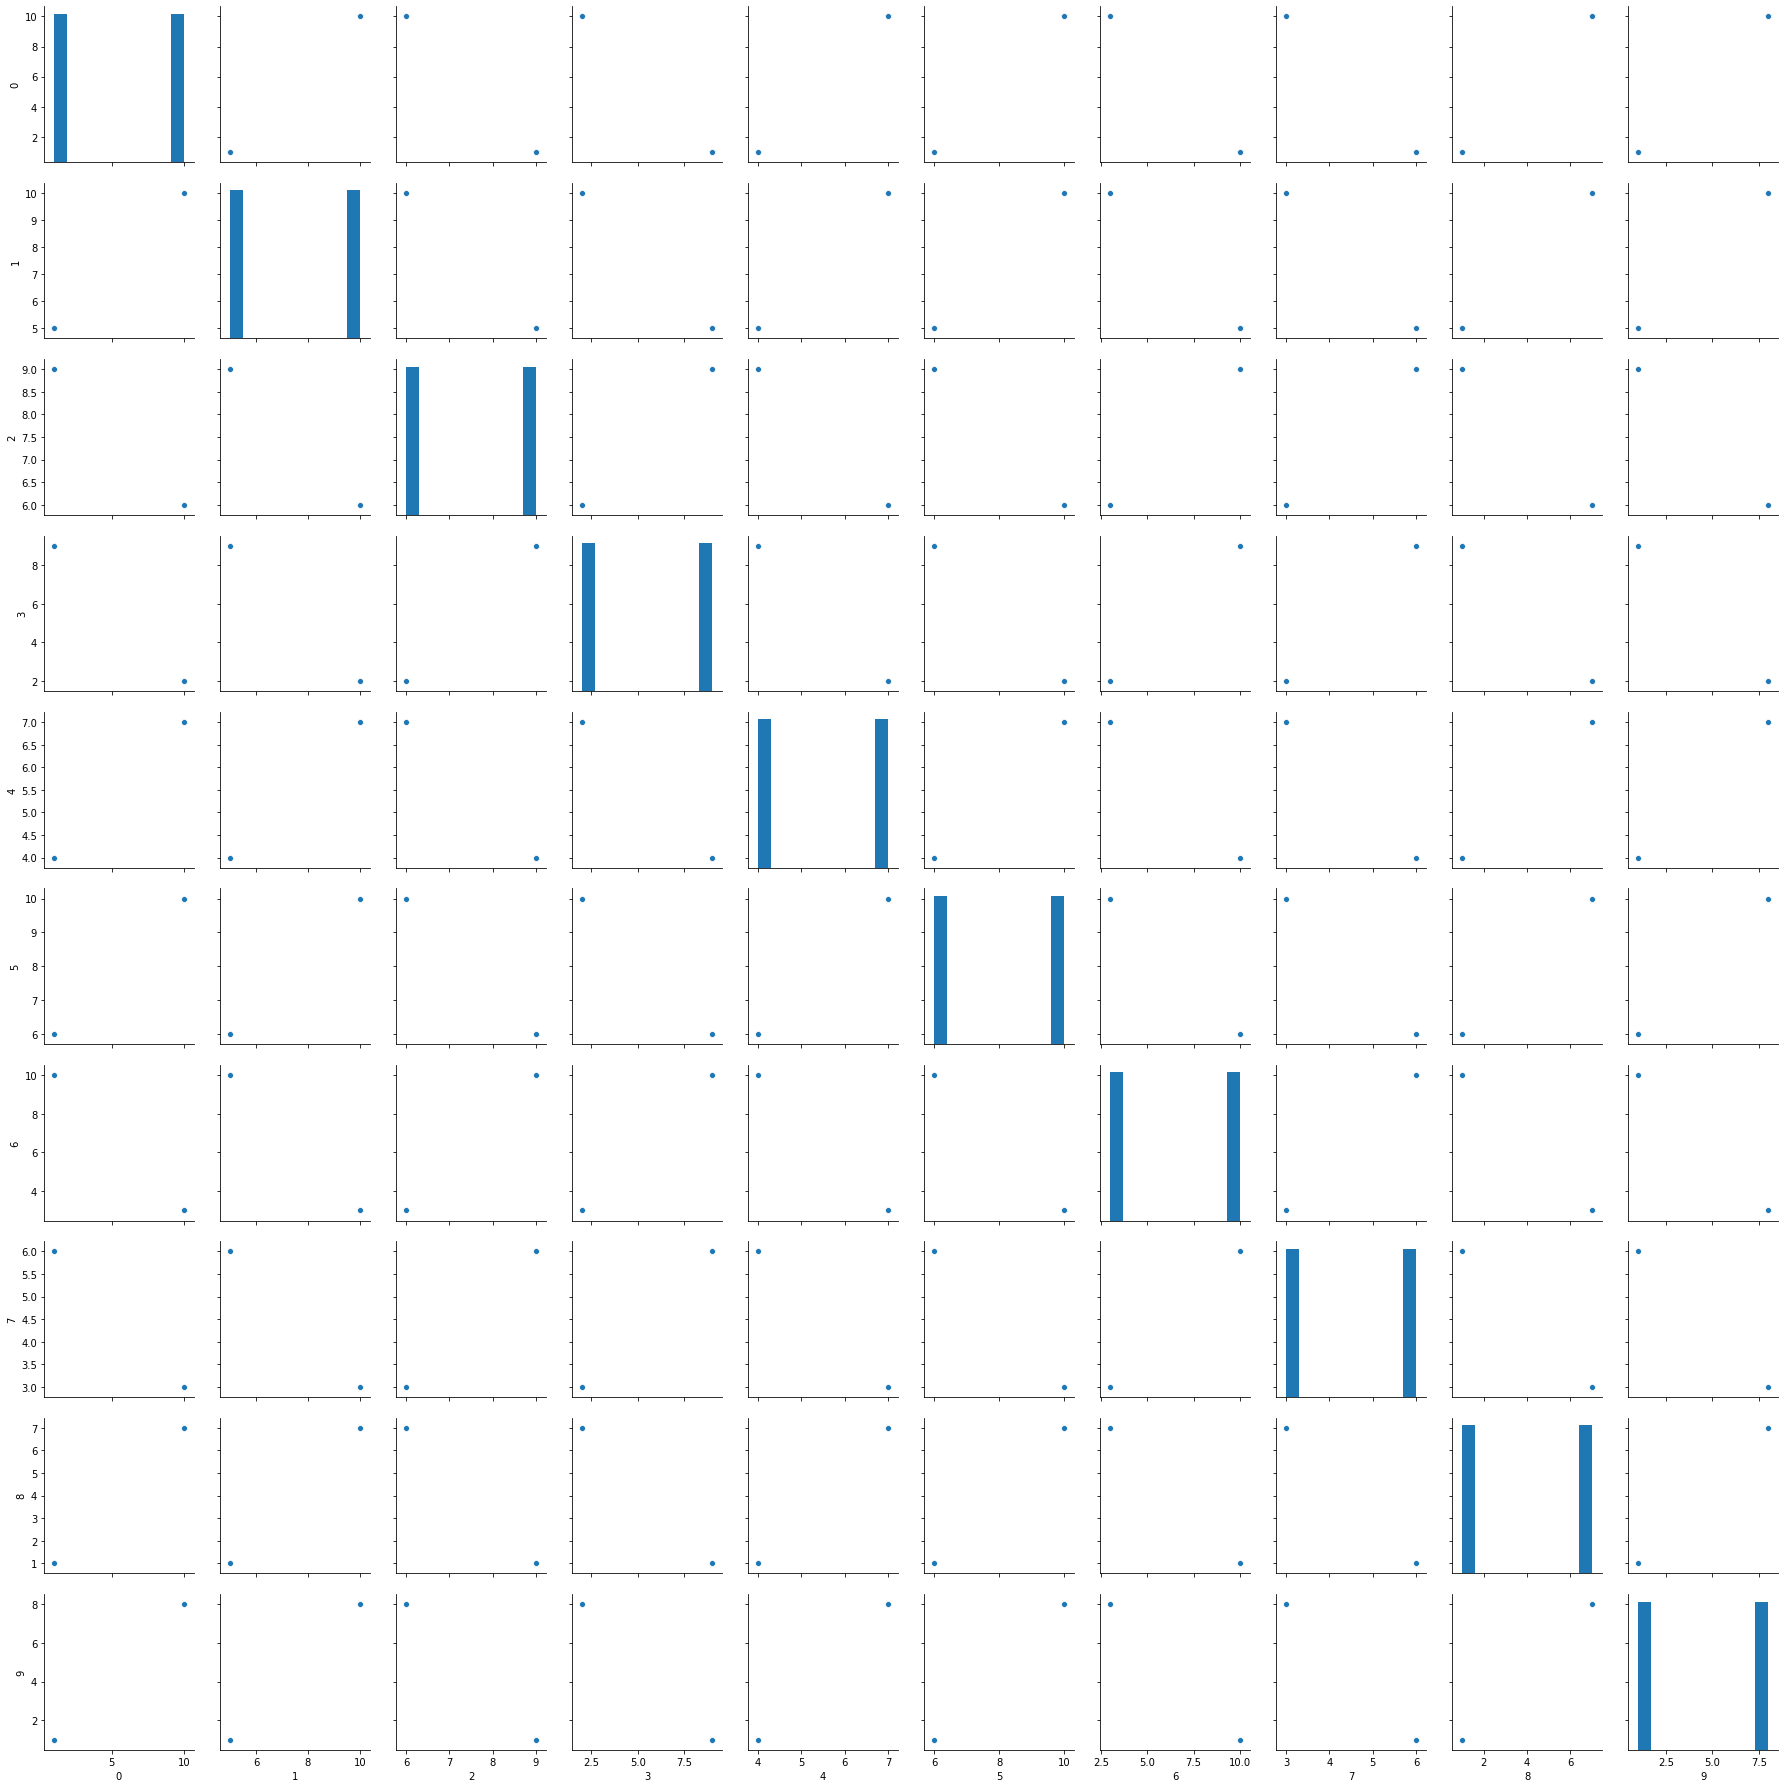

In [69]:
## What a wonderful error.
import random

fakeD = pd.DataFrame([[random.randint(1,10) for _ in range(10)] for _ in range(2)])
fakeD.head()

sb.pairplot(fakeD)

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [70]:
## From: https://www.dataquest.io/blog/python-api-tutorial/
import requests

In [72]:
## Create request object with JSON information about spacestation location
response = requests.get("http://api.open-notify.org/iss-now.json")
# Print the status code of the response.
print(response.status_code)

200


In [73]:
print(response.content)

b'{"message": "success", "iss_position": {"longitude": "146.9002", "latitude": "19.0114"}, "timestamp": 1562711541}'


In [ ]:
## Pretty cool, especially when authorization isn't required